In [23]:
import torch
from torch import nn
from matplotlib import pyplot as plt
from torch import nn
import numpy as np

pi = np.pi

def sigmoid(x): return 1 / (1 + np.exp(-x))


def raised_cosine_filter(beta0, T0, num_points=1000, s=1):
    lin = np.linspace(-5, 5, num_points)
    abs_lin = np.abs(lin)  # Renamed to avoid shadowing 'abs' function

    f1 = (1 - beta0) / (2 * T0)
    f2 = (1 + beta0) / (2 * T0)
    
    f_ = 1 / 2 * (1 + np.cos(np.pi * T0 / beta0 * (abs_lin - f1)))  
    
    out = 1 * (sigmoid(s*(abs_lin)) - sigmoid(s*(abs_lin - f1))) \
     + f_ * (sigmoid(s*(abs_lin - f1)) - sigmoid(s*(abs_lin - f2)))
        
    return lin, out


C:\Users\pandu\AppData\Local\Temp\ipykernel_25928\1651567507.py:9: RuntimeWarning: overflow encountered in exp
  def sigmoid(x): return 1 / (1 + np.exp(-x))


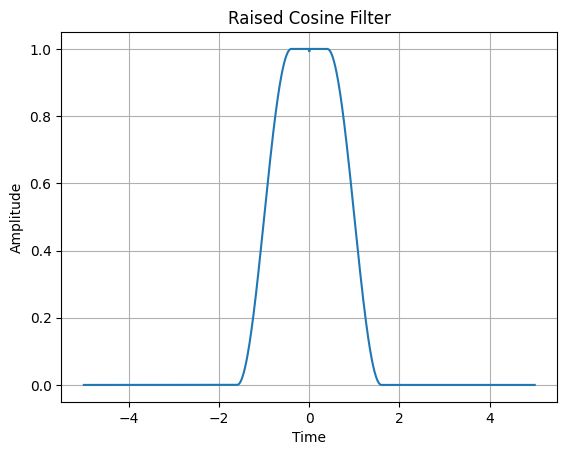

In [24]:
# Parameters
s = 1000
beta = 0.6 # Roll-off factor
T = 0.5 # Symbol period

# Generate filter valuest\
t, rc_filter = raised_cosine_filter(beta, T, s=s)

# Plot the filter
plt.plot(t, rc_filter)
plt.title('Raised Cosine Filter')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

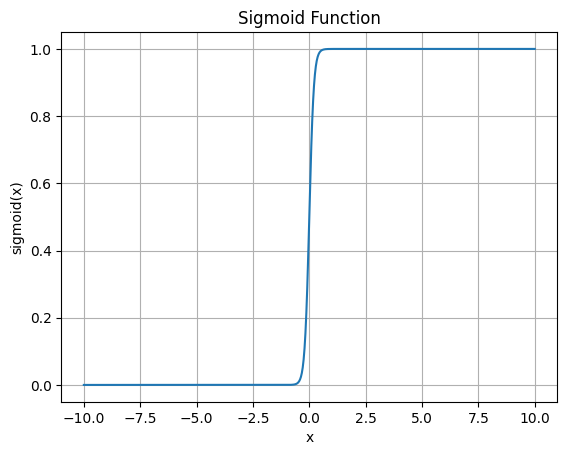

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate an array of x values (input range)
x = np.linspace(-10, 10, 1000)

# Apply the sigmoid function to each x value
s = 10
y = sigmoid(s*x)

# Plot the sigmoid function
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()


# View Results

In [36]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from modules import utils
import cv2
from modules.utils import psnr

### Set Parameters

In [37]:
T0 = 0.6
b0 = 0.5
noisy = False
hidden_layers = 4
nonlin = 'raisedCos' 

### Load Ground Truth Image

In [38]:
im = utils.normalize(plt.imread('images/parrot.png').astype(np.float32), True)
im = cv2.resize(im, None, fx=1/2, fy=1/2, interpolation=cv2.INTER_AREA)

### Load saved image file

In [39]:
mats = io.loadmat(f"results/denoising/{nonlin}_T{T0}_b{b0}_noisy({noisy})_hiddenLayrs({hidden_layers}).mat")
img = mats['rec']
img_unclipped = img.copy()

### Clipping pixel data

In [40]:
img[img > 1] = 1
img[img < 0] = 0

### Plot images before clipping

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


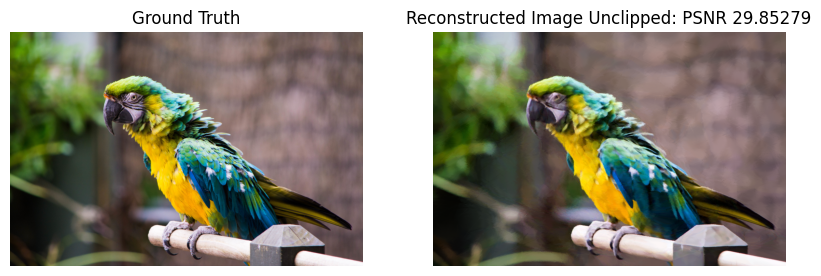

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(im)
axes[0].set_title('Ground Truth')
axes[0].axis('off')  # Hide axis

# Display the second image
axes[1].imshow(img_unclipped)
axes[1].set_title(f"Reconstructed Image Unclipped: PSNR {round(utils.psnr(im, img_unclipped), 5)}")
axes[1].axis('off')  # Hide axis

plt.show()

### Plot images after clipping

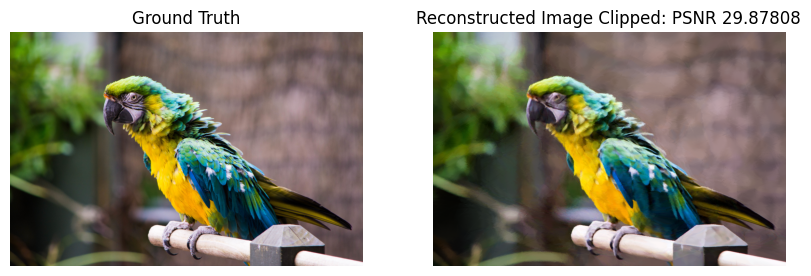

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(im)
axes[0].set_title('Ground Truth')
axes[0].axis('off')  # Hide axis

# Display the second image
axes[1].imshow(img)
axes[1].set_title(f"Reconstructed Image Clipped: PSNR {round(utils.psnr(im, img), 5)}")
axes[1].axis('off')  # Hide axis

plt.show()

In [32]:
negative_values = img[img > 1]
print(f"Negative values: {negative_values.shape}")

Negative values: (0,)


In [33]:
negative_values = img_unclipped[img_unclipped > 1]
print(f"Negative values: {negative_values.shape}")

Negative values: (2532,)
